In [1]:
import numpy as np
import pandas as pd

In [2]:
game_data = pd.read_csv('Game_Data.csv')
game_data.head()

,Year,Week,HomeTeam,AwayTeam,HomeScore,AwayScore,PointDiff,HomeLine,AwayLine,PredictTotal,...,HOME_DefRushDVOA,HOME_STDVOA,VISIT_TotalDVOA,VISIT_OffenseDVOA,VISIT_OffPassDVOA,VISIT_OffRushDVOA,VISIT_DefenseDVOA,VISIT_DefPassDVOA,VISIT_DefRushDVOA,VISIT_STDVOA
0,2019,5,KC,IND,13,19,-6,-10.0,10.0,57.0,...,0.011,0.005,0.338,0.034,0.078,0.011,-0.233,-0.211,-0.291,0.070
1,2015,2,CHI,ARI,23,48,-25,1.5,-1.5,44.5,...,0.124,-0.150,1.004,0.561,1.037,0.136,-0.273,-0.205,-0.326,0.170
2,2019,5,DAL,GB,24,34,-10,-4.0,4.0,48.0,...,0.204,-0.174,0.189,0.176,0.184,0.290,0.033,0.042,0.018,0.045
3,2015,5,DET,ARI,17,42,-25,2.5,-2.5,44.0,...,0.601,-0.016,0.845,0.474,0.685,0.478,-0.330,-0.322,-0.355,0.042
4,2015,6,PIT,ARI,25,13,12,3.0,-3.0,44.0,...,-0.357,0.109,0.223,0.189,0.500,-0.431,-0.112,0.097,-0.246,-0.078


In [4]:
X = game_data[['HomeLine', 'PredictTotal', 'HOME_OffenseDVOA', 'HOME_OffPassDVOA', 'HOME_OffRushDVOA', 'HOME_DefPassDVOA', 'HOME_DefRushDVOA', 'HOME_STDVOA', 'VISIT_OffenseDVOA', 'VISIT_OffPassDVOA', 'VISIT_OffRushDVOA', 'VISIT_DefPassDVOA', 'VISIT_DefRushDVOA', 'VISIT_STDVOA' ]]
y = game_data[['PointDiff']]
print(X.shape, y.shape)


(1016, 14) (1016, 1)


In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.7905109323309207


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=29)
model.fit(X_train, y_train)


MSE = mean_squared_error(y_train, model.predict(X_train))
r2 = model.score(X_train, y_train)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 40.34372133954736, R2: 0.8039438876254287


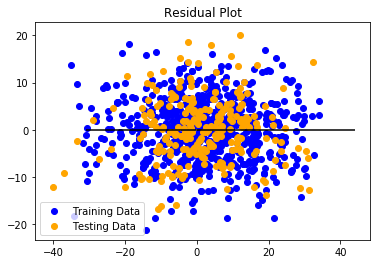

In [10]:
import matplotlib.pyplot as plt
    
predictions = model.predict(X_test)

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [19]:
y_test

,PointDiff
612,7
628,33
41,6
687,3
615,-7
211,-7
912,3
10,3
819,3
1000,9


In [20]:
predictions

array([[  2.59318681],
       [ 19.25418462],
       [ 13.8444746 ],
       [ -2.13374749],
       [-11.23744628],
       [ -8.99847356],
       [  2.63919665],
       [ -1.44806308],
       [  7.16245549],
       [  1.86415053],
       [  2.55860946],
       [  5.77160608],
       [ 12.32972738],
       [  9.58478001],
       [ -1.67277092],
       [  3.07148791],
       [  4.59221471],
       [ 13.08624769],
       [  0.90080343],
       [ -2.57419223],
       [ -7.8879001 ],
       [ 21.07165454],
       [ -6.54233161],
       [ -7.49228614],
       [ 19.33183597],
       [ 28.66679813],
       [ -4.37291742],
       [ -2.37699058],
       [ 12.06292538],
       [-28.90316866],
       [ 12.2532186 ],
       [-15.79649182],
       [ 11.88022354],
       [-40.15520143],
       [  6.8675032 ],
       [-13.72690343],
       [-15.23796735],
       [ -4.63998697],
       [  9.6608535 ],
       [  6.34535719],
       [ -6.82284145],
       [ -9.73067445],
       [ -1.01847368],
       [-23